# EDA

## IMPORTING PACKAGES

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='dark',palette='pastel')

#To increase autocomplete response speed
%config IPCompleter.greedy=True

## DATA IMPORTATION

Project path.

In [49]:
project_path = (r'C:\Users\pedro\PEDRO\DS\Portfolio\LEAD_SCORING').replace('\\','/')

Names of data files.

In [50]:
cat_name = 'cat_result_quality.pickle'
num_name = 'num_result_quality.pickle'

Data importation.

In [51]:
cat = pd.read_pickle(project_path + '/02_Data/03_Work/' + cat_name)
num = pd.read_pickle(project_path + '/02_Data/03_Work/' + num_name)

## SEED QUESTIONS

**Regarding Leads:**
- Q1: What are the main demographic profiles in the company's lead database?

**Regarding conversion Rate:**
- Q2: What is the lead-to-customer conversion rate the company is currently achieving?
- Q3: What factors affect lead-to-customer conversion the most?

**Regarding commercial and marketing channels:**
- Q4: How are the company's commercial/marketing channels performing?
- Q5: From what sources is the company attracting potential customers? Which are the most promising ones?
- Q6: Which demographic profile should be the main focus of marketing actions?
- Q7: What percentage of leads are open to receiving communications by email or phone calls?
- Q8: How did the company's advertising campaigns perform?
- Q9: How is the current lead magnet performing?

---

**Lead-to-customer conversion rate (as is):**

In [5]:
num.converted.value_counts().sort_index()[1]/num.shape[0]

0.38649891774891776

## EDA - CATEGORICAL FEATURES

### Statistical analysis

In [6]:
def frequency_categorical(dataframe):
    check = (~((dataframe.dtypes == 'category')|(dataframe.dtypes == 'object'))).sum()
    
    if check>0:
        dataframe = dataframe.select_dtypes(['O','category'])
        print('Features of dtype = [number, datetimes, timedeltas, datetimetz] have been omitted from this analysis.')
    
    freq_results = dataframe.apply(lambda x: x.value_counts(normalize=True)).T.stack()\
                   .to_frame().reset_index()\
                   .rename(columns={'level_0':'feature','level_1':'value',0:'frequency'})\
                   .sort_values(by=['feature','frequency'],ascending=True)
    return(freq_results)

In [7]:
frequency_categorical(cat)

,feature,value,frequency
106,activity_index,03.Low,0.040584
104,activity_index,01.High,0.088339
105,activity_index,02.Medium,0.416802
107,activity_index,Null,0.454275
41,city,Tier II Cities,0.007576
...,...,...,...
91,tags,Ringing,0.132440
93,tags,Will revert after reading the email,0.226055
92,tags,Untagged,0.359578
81,through_recommendations,Yes,0.000676


### Graphical analysis

In [8]:
def plot_eda_categorical(dataframe, target):
    df = pd.concat([dataframe,target],axis=1)
   
    for i, feature in enumerate(dataframe):
        n_categories = df[feature].nunique()
        feature_name = feature.replace('_',' ')
               
        print('\n' + feature.replace('_',' ').upper() + '\n' + '-'*120)
        
        f, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6), constrained_layout=True)
        
        # countplot
        sns.countplot(data=df, x=feature, ax=ax[0], palette='pastel', alpha=0.7)
        ax[0].set_title(feature,fontsize=13, fontweight='bold')
        ax[0].set_ylabel('Count',fontsize=13)
        ax[0].set_xlabel(feature_name + ' categories',fontsize=13)
        ax[0].tick_params(axis='x', labelrotation=90)
        for i in ax[0].containers:
            ax[0].bar_label(i,labels=[str(x) + '%' for x in np.round(i.datavalues*100/sum(i.datavalues),2)])
          
        
        # composition
        sns.countplot(data=df, x=feature, hue=target.name, ax=ax[1], palette='Blues', alpha=0.7)
        ax[1].set_title(feature + ' ' + 'composition',fontsize=13, fontweight='bold')
        ax[1].set_ylabel('Count',fontsize=13)
        ax[1].set_xlabel(feature_name + ' categories',fontsize=13)
        ax[1].tick_params(axis='x', labelrotation=90)
        for i in ax[1].containers:
            ax[1].bar_label(i,)
    
        # conversion rate
        sns.barplot(data=df, y=target.name, x=feature, estimator=np.mean, ci=None, ax=ax[2], palette='Blues', alpha=0.7)
        ax[2].set_title(feature + ' ' + 'conversion rate',fontsize=13, fontweight='bold')
        ax[2].set_ylabel('Conversion rate (%)',fontsize=13)
        ax[2].set_xlabel(feature_name + ' categories',fontsize=13)
        ax[2].tick_params(axis='x', labelrotation=90)
        for k in ax[2].patches:
                 ax[2].annotate('{:.1f}%'.format(k.get_height()*100),(k.get_x()+0.2, k.get_height()+0.01));
        
        plt.show()


LEAD ORIGIN
------------------------------------------------------------------------------------------------------------------------


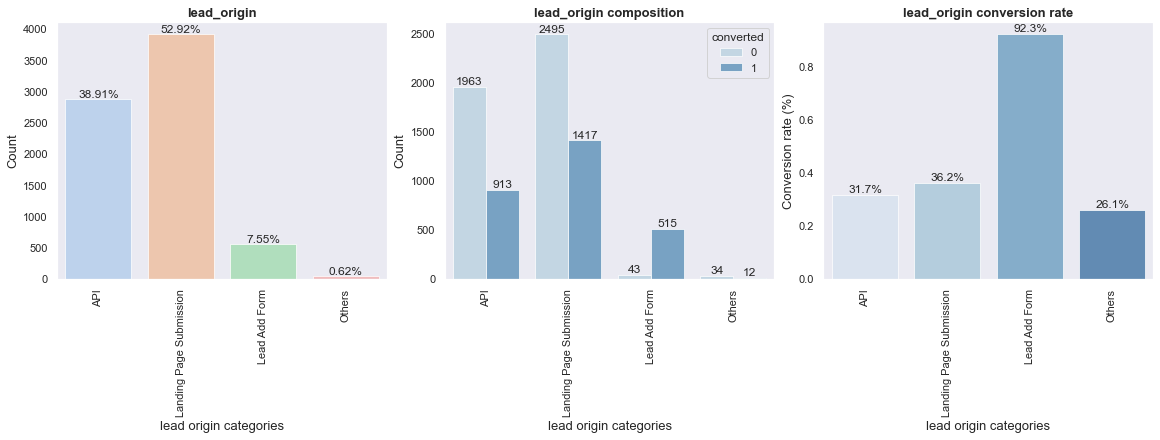


SOURCE
------------------------------------------------------------------------------------------------------------------------


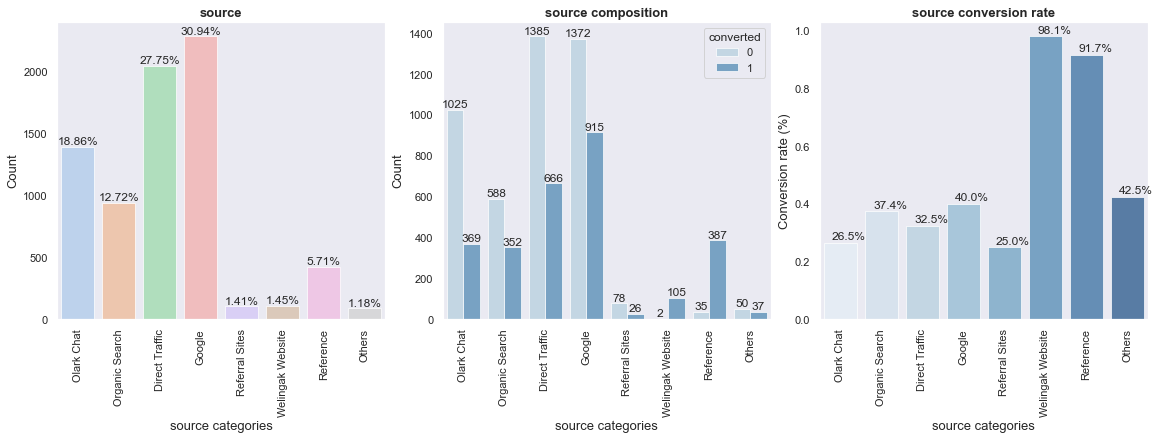


DO NOT EMAIL
------------------------------------------------------------------------------------------------------------------------


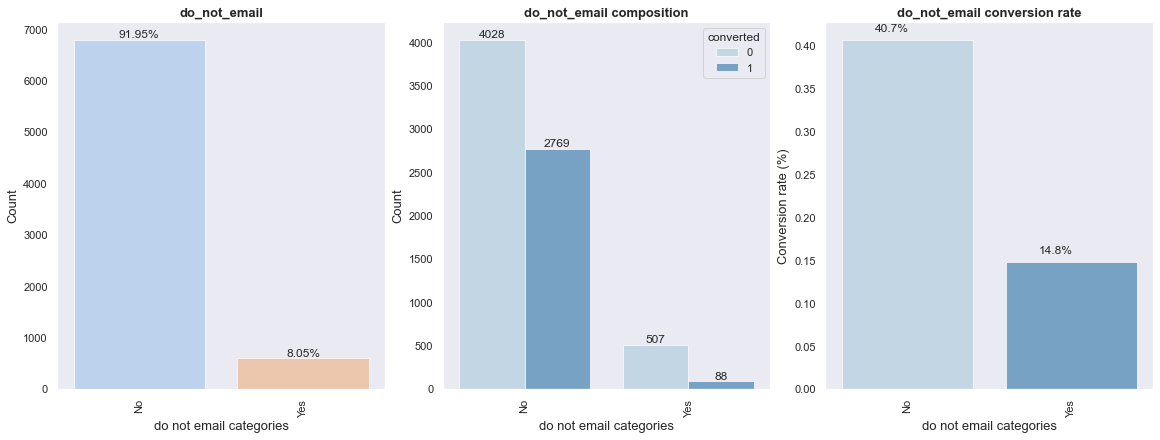


DO NOT CALL
------------------------------------------------------------------------------------------------------------------------


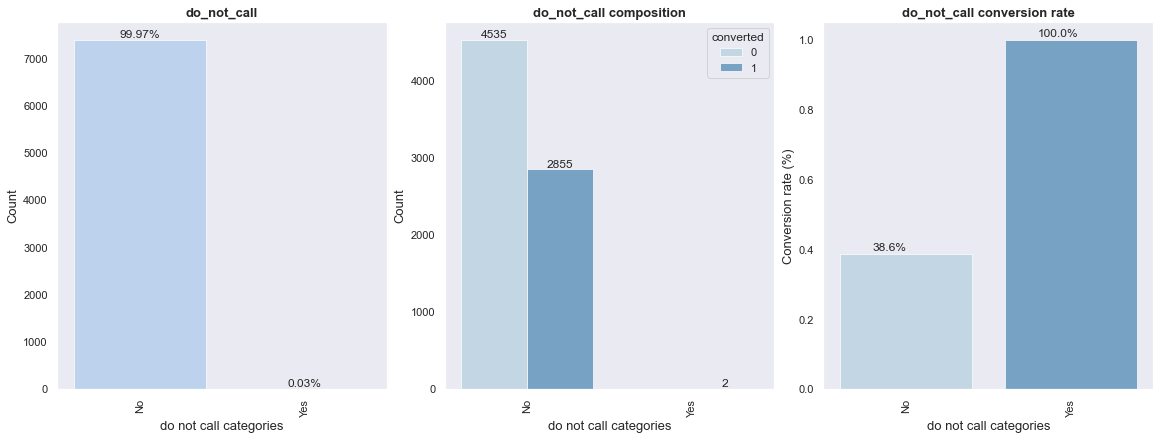


LAST ACTIVITY
------------------------------------------------------------------------------------------------------------------------


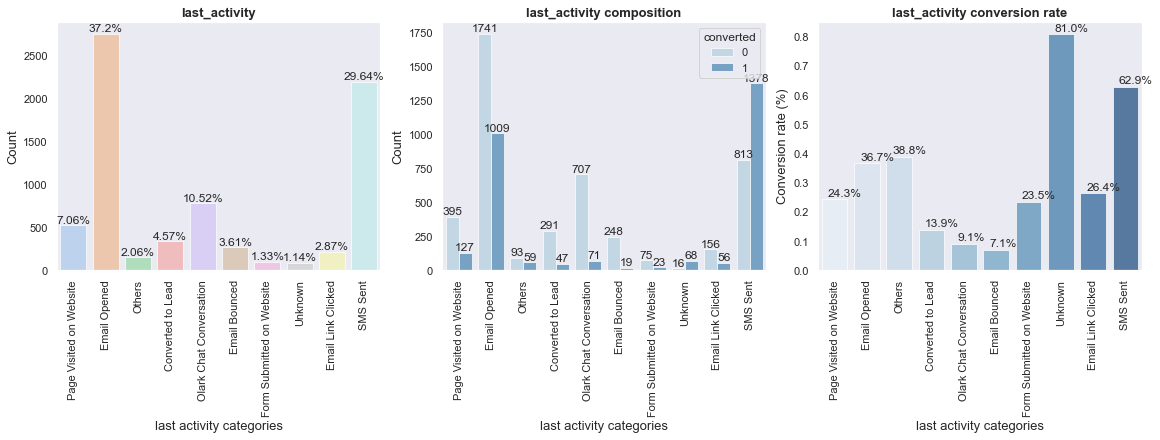


LAST NOTABLE ACTIVITY
------------------------------------------------------------------------------------------------------------------------


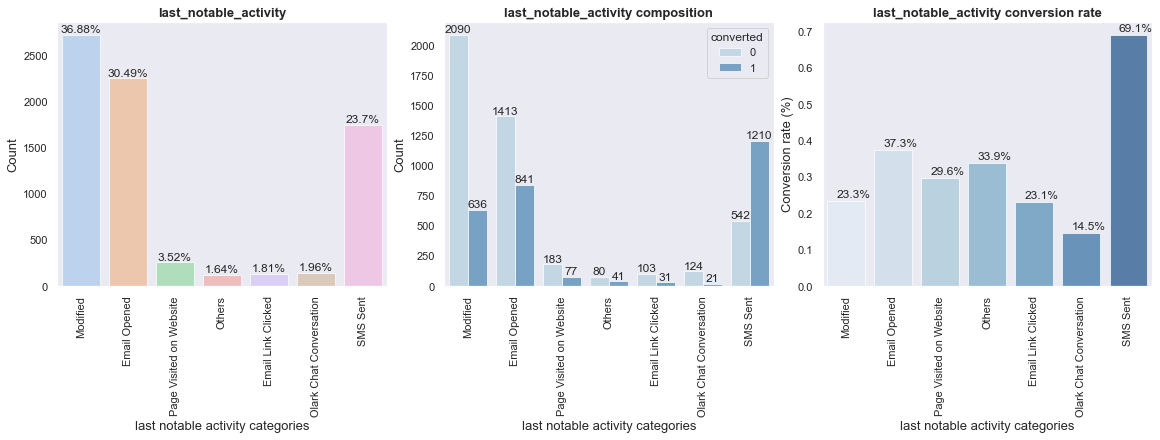


COUNTRY
------------------------------------------------------------------------------------------------------------------------


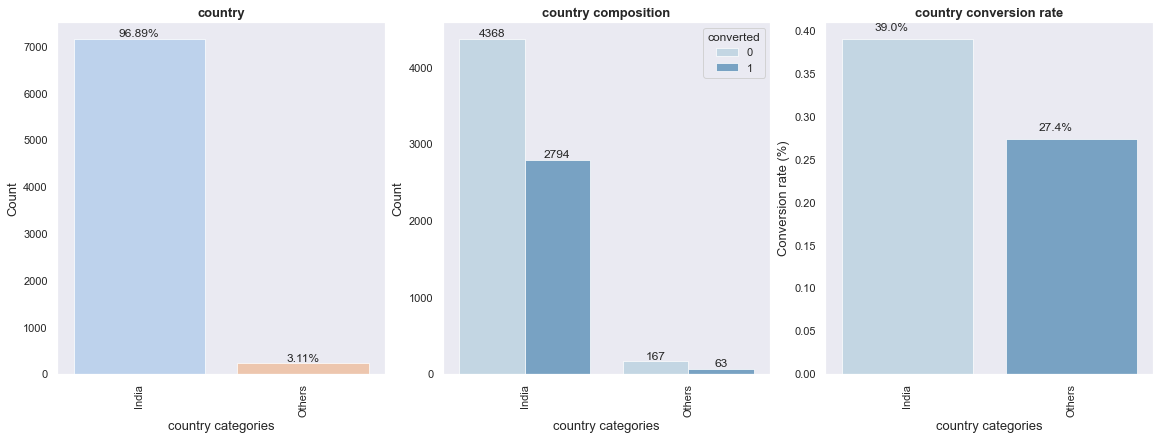


CITY
------------------------------------------------------------------------------------------------------------------------


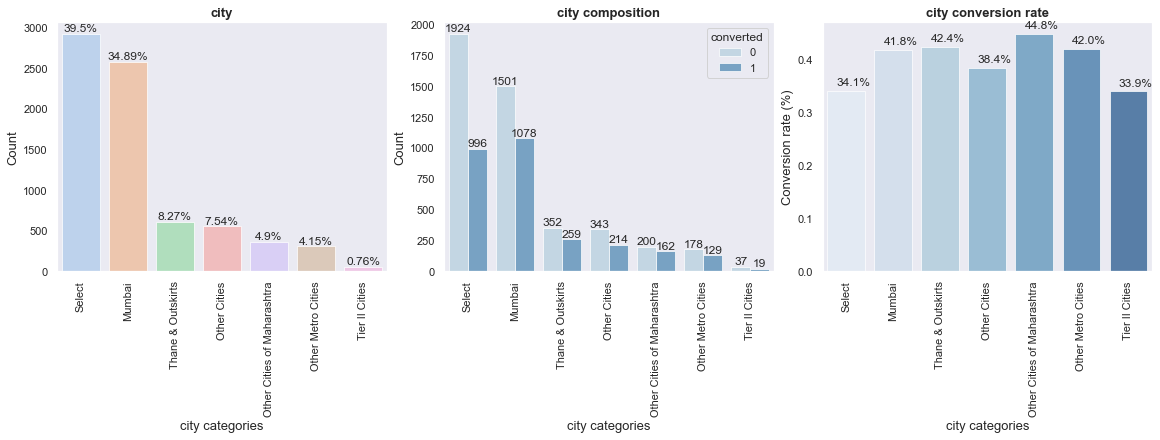


SPECIALIZATION
------------------------------------------------------------------------------------------------------------------------


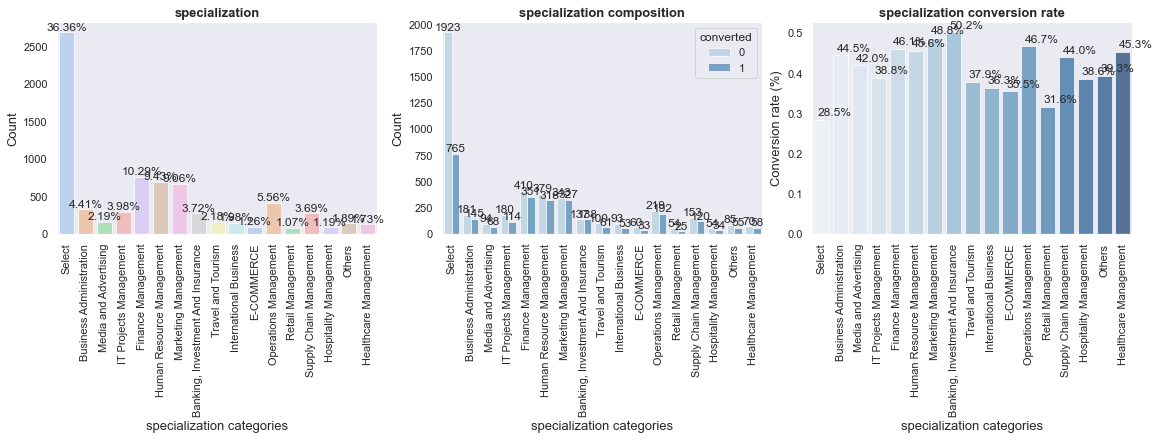


OCUPATION
------------------------------------------------------------------------------------------------------------------------


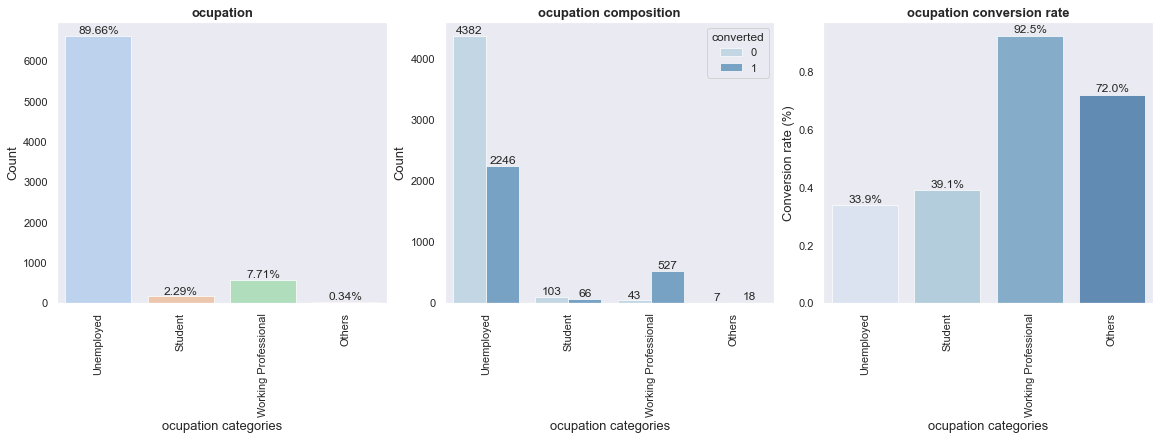


HEAR ABOUT
------------------------------------------------------------------------------------------------------------------------


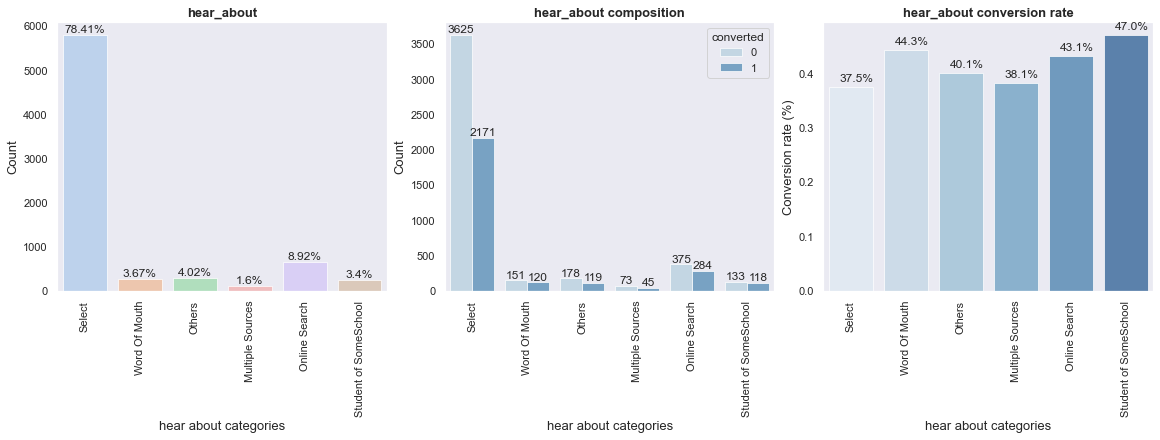


MATTERS MOST
------------------------------------------------------------------------------------------------------------------------


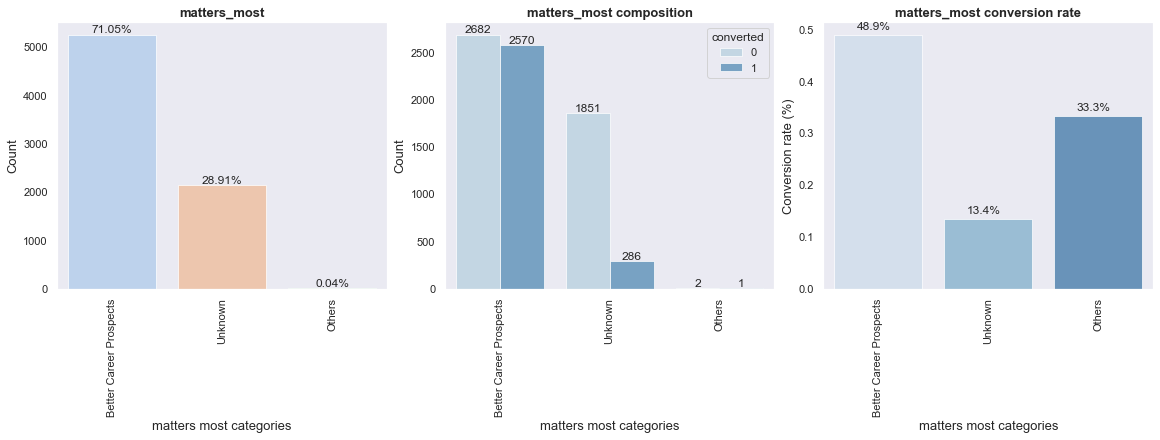


SEARCH
------------------------------------------------------------------------------------------------------------------------


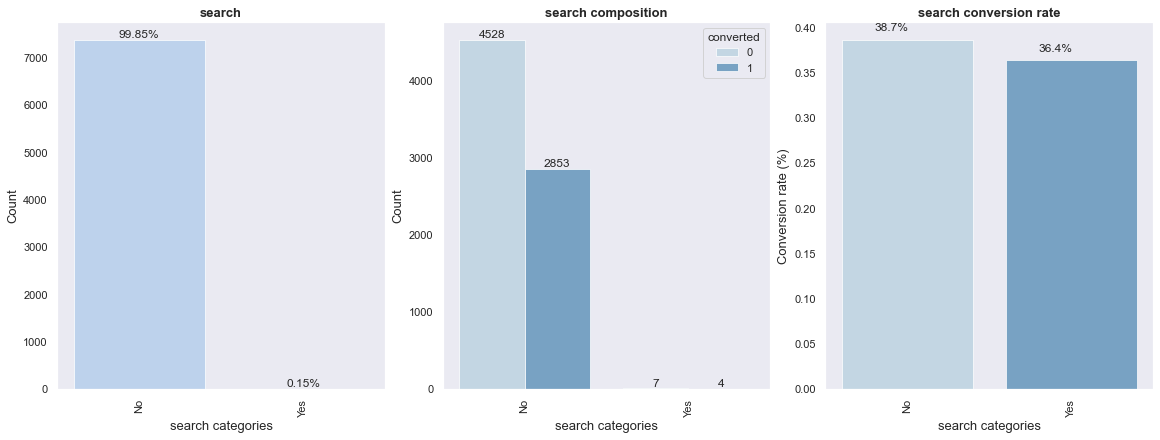


NEWSPAPER ARTICLE
------------------------------------------------------------------------------------------------------------------------


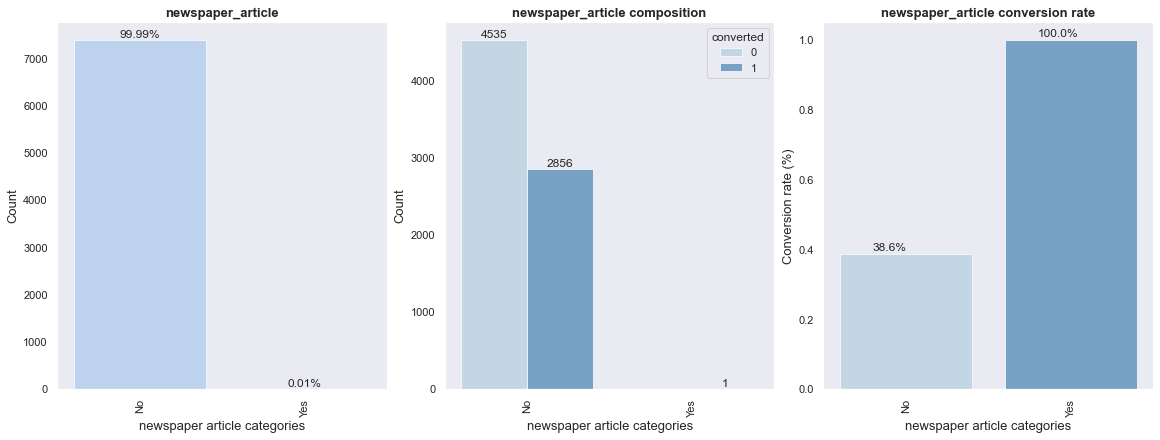


NEWSPAPER
------------------------------------------------------------------------------------------------------------------------


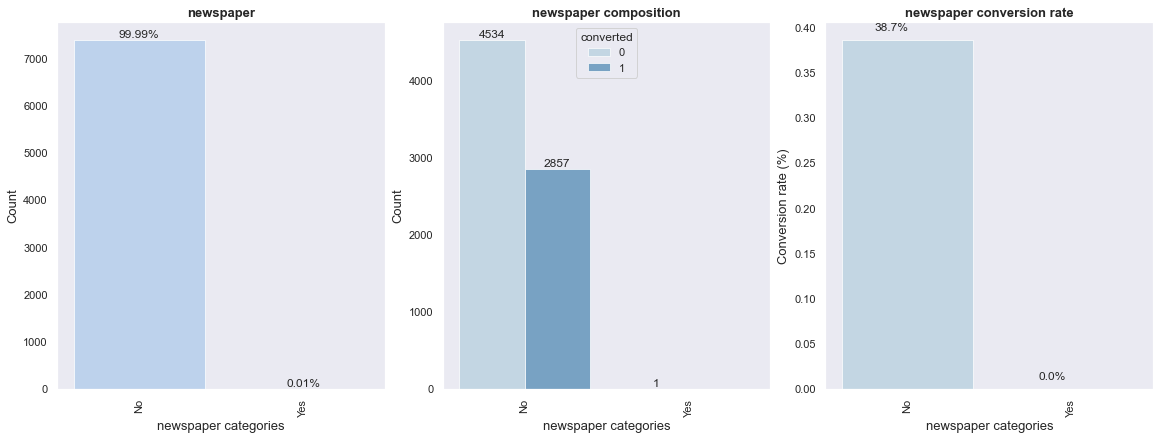


DIGITAL ADVERTISEMENT
------------------------------------------------------------------------------------------------------------------------


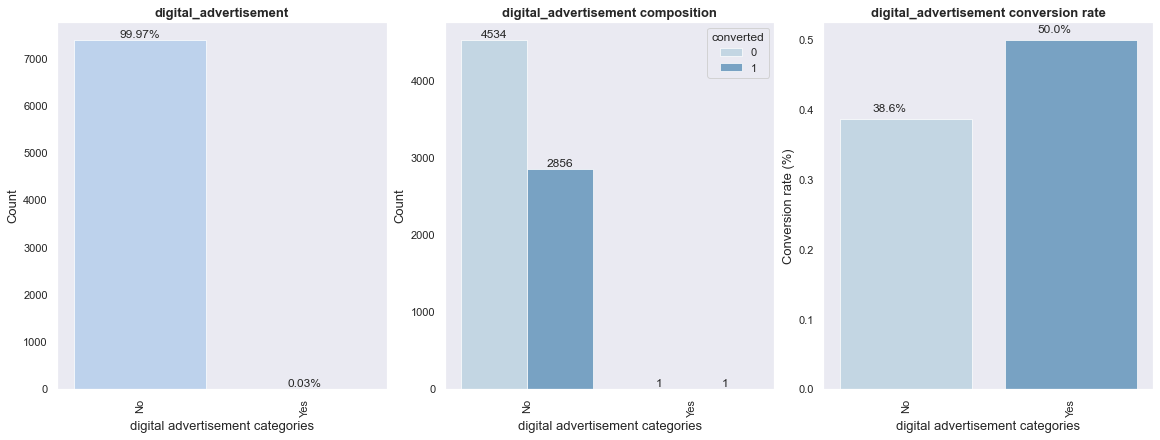


THROUGH RECOMMENDATIONS
------------------------------------------------------------------------------------------------------------------------


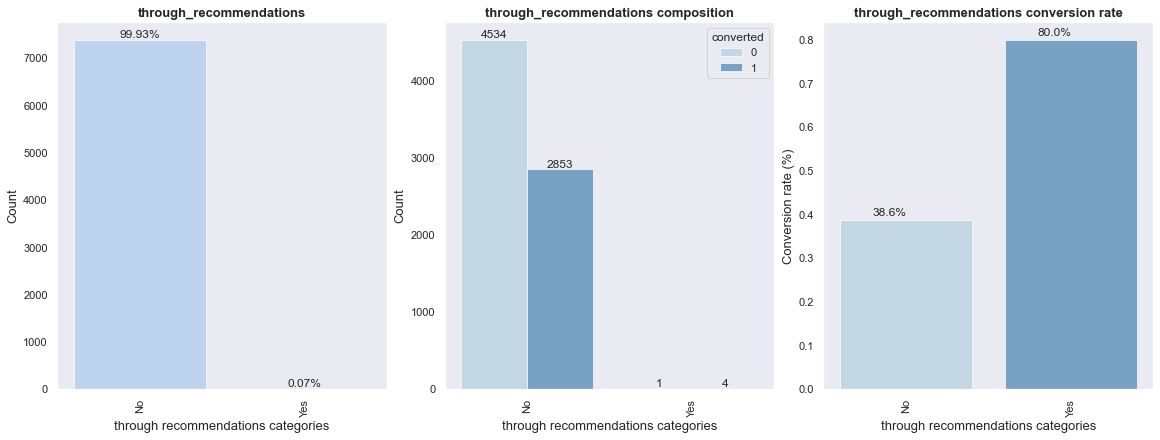


TAGS
------------------------------------------------------------------------------------------------------------------------


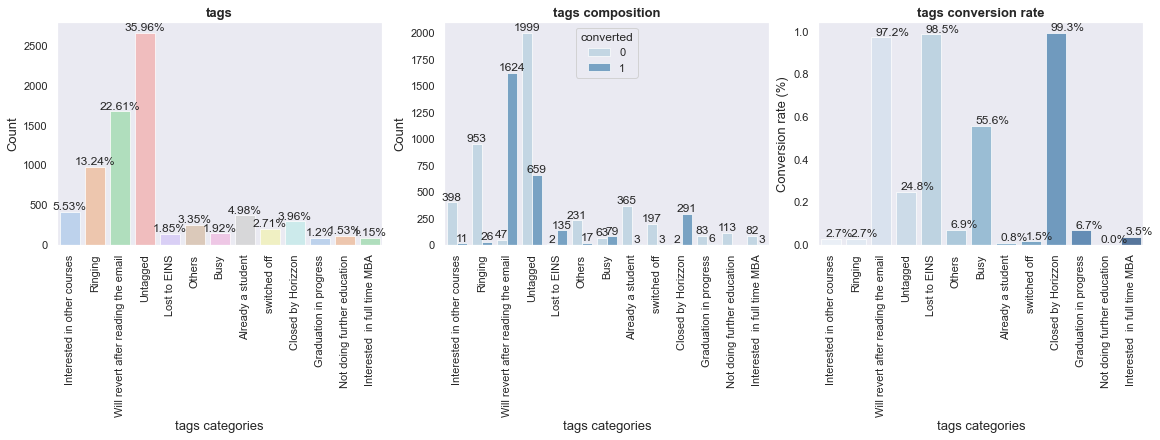


LEAD QUALITY
------------------------------------------------------------------------------------------------------------------------


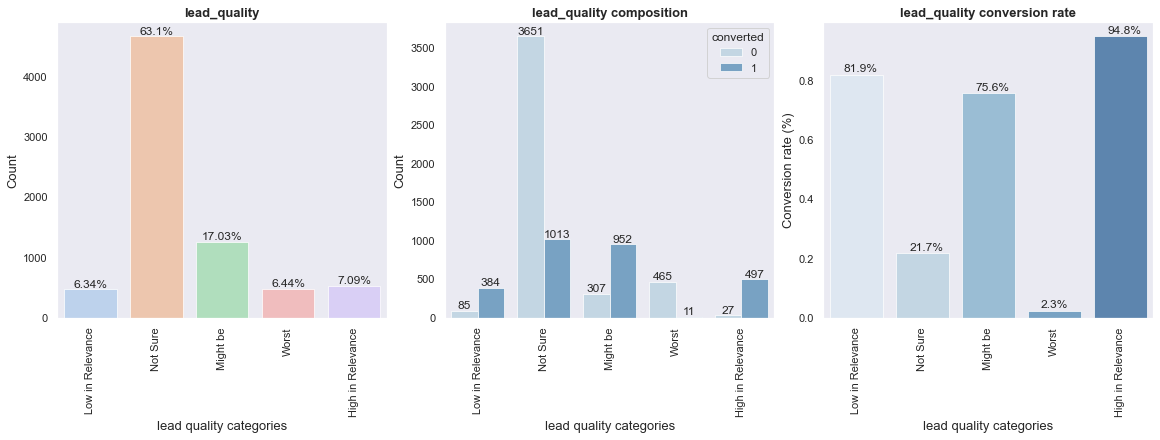


LEAD PROFILE
------------------------------------------------------------------------------------------------------------------------


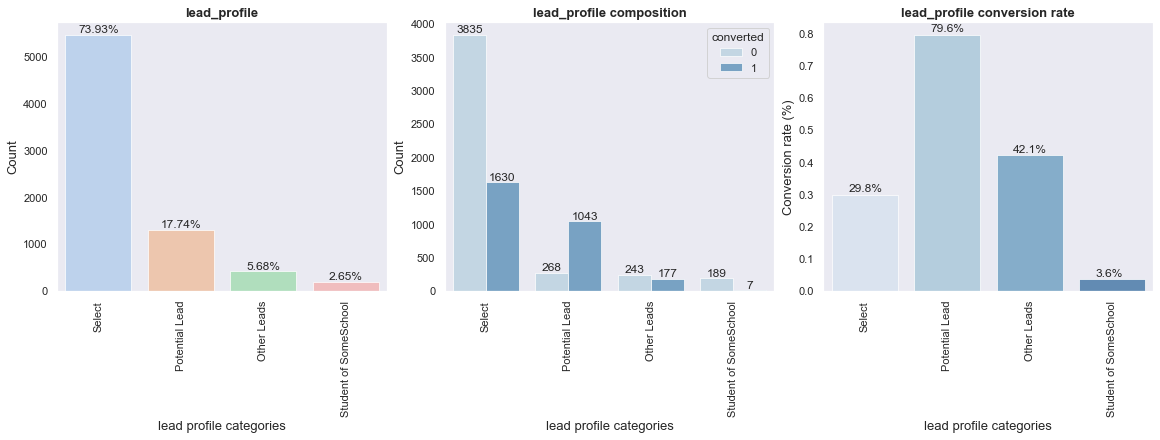


ACTIVITY INDEX
------------------------------------------------------------------------------------------------------------------------


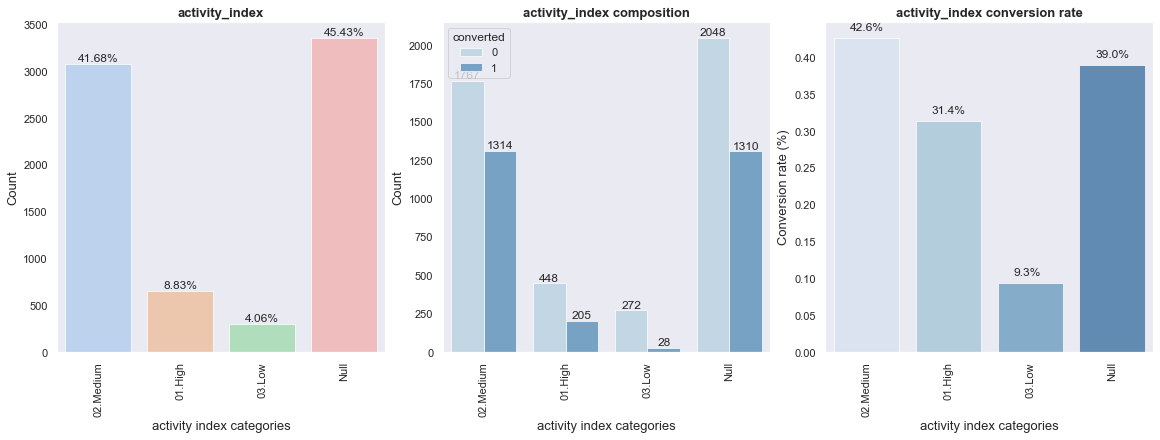


PROFILE INDEX
------------------------------------------------------------------------------------------------------------------------


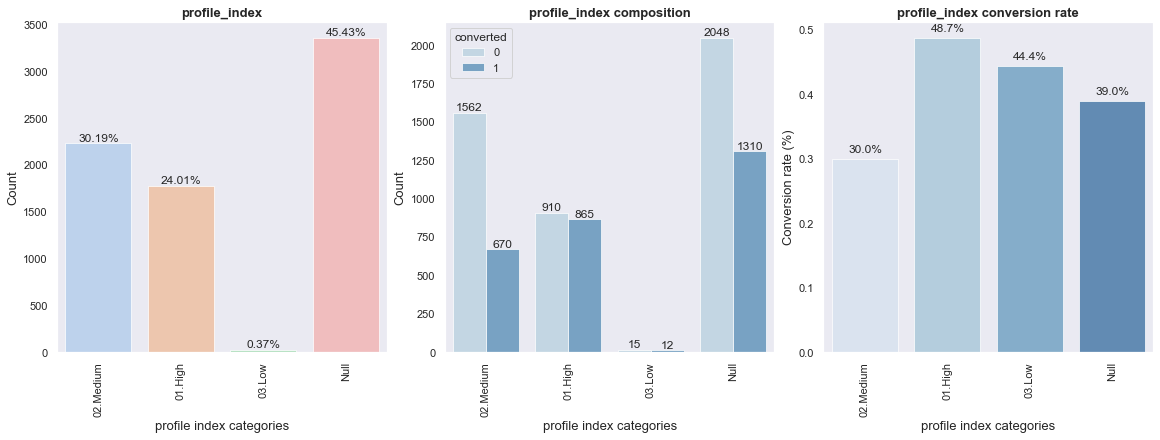


LEAD MAGNET
------------------------------------------------------------------------------------------------------------------------


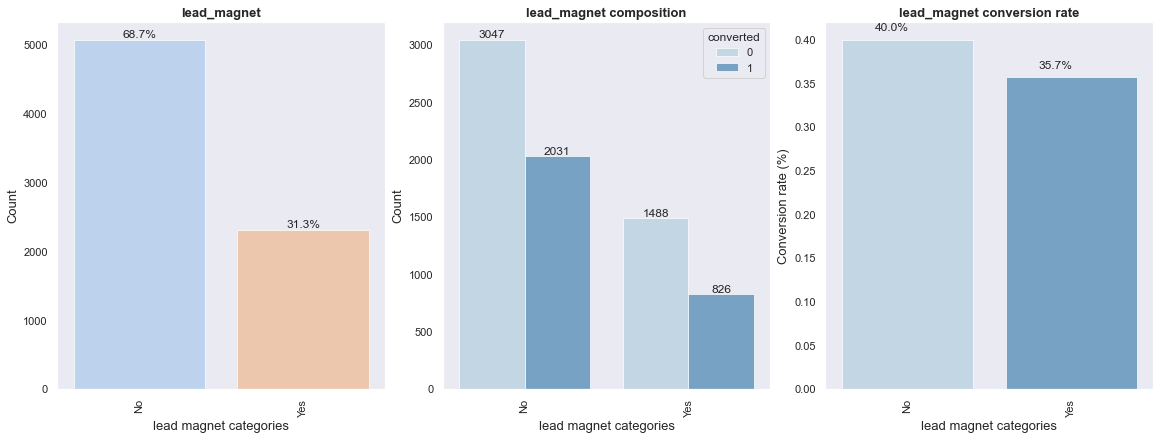

In [9]:
plot_eda_categorical(cat, num['converted'])

**Lead origin**
- 91,8% of leads come from API and Landing page submission, however the conversion rate of leads comming from these origins is less than the average overall conversion rate.
- Lead add form has the best conversion rate (92,3%) but overall conversion count is low.

Question: *Why does the lead add form has such a high conversion rate?*
- Leads who fill in the form come mainly from 'Reference' and 'Welingak Website' sources which are the ones with the highest conversion rates.

In [10]:
cat[cat.lead_origin=='Lead Add Form'].source.value_counts()

Reference           422
Welingak Website    107
Others               26
Olark Chat            2
Google                1
Name: source, dtype: int64

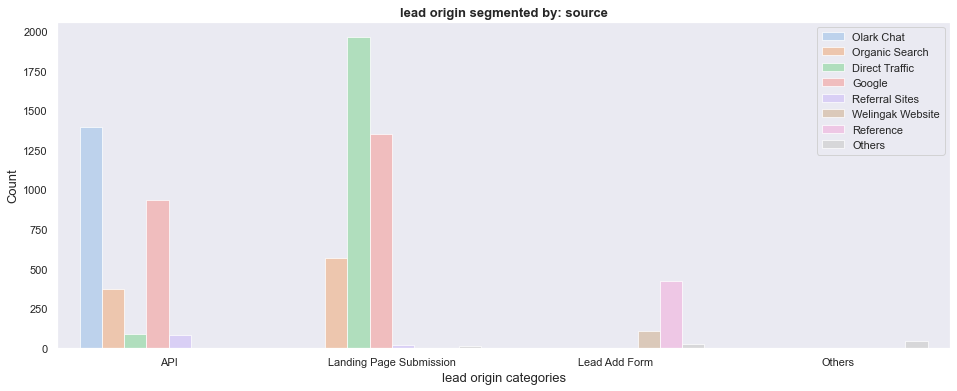

In [11]:
f,ax = plt.subplots(figsize=(16,6))
sns.countplot(data=cat, x='lead_origin', hue='source', palette='pastel', alpha=0.7)
    
ax.set_title('lead origin segmented by: source', fontsize=13, fontweight='bold')
ax.set_ylabel('Count',fontsize=13)
ax.set_xlabel('lead origin categories',fontsize=13)
ax.legend(loc='upper right');

- Focus should be on improving  'API' and 'Landing page submission' conversion rates, and generating more leads who come from 'References' or 'Welingak Website'.

**Source**
- Most leads come from Google and Direct traffic. Organic search and Olark chat generates a significat number of leads too. All these sources have room for improvement in their conversion rate.
- Almost all leads from Welingak website and References have converted.
    - High conversion rate were expected for leads generated by References as recommendations usually come from friends, family members, and others within lead’s close circles.
    - Further study of the marketing actions carried out by Welingak website is highly recommended.
    - Company should invest more resources into acquiring leads from these sources.

**Emails and calls**

In [12]:
cat.loc[~((cat.do_not_call=='No') & (cat.do_not_email=='No'))].shape[0] / cat.shape[0] * 100

8.0762987012987

- Around 92% of leads do not like to be called or receive emails about the course.
- Email marketing strategies can be improved, as only 14.8% of leads who want to be contacted by email end up converting into paying customers.

**Last activity and Last notable activity**
- Sms campaigns had a high performance as they achieved conversion rates of 60%-70% and reached a significant number of leads.
- Olark chat conversation and Page Visited on Website generate significant number of leads but their conversion rate is around 9% and 24%.
- Email marketing campaigns have untapped potential, as the last notable activity/last activity of 30%-37% of total number of leads was opening an email but only about 37% of them were converted after it.
- Efforts should focus on reaching even more leads with SMS campaigns and on increasing the conversion rate of Olark Chat,emails and company's website.

**country and city**
- A sizable proportion of leads acquired are from Mumbai. 
- Conversion rates for all the cities is close to the overall average (38%).
- Marketing content and campaigns should be tailored to these demographic profiles.

**ocupation and specialization**
- Working professionals have high conversion rates although very less count. They should be targetted more, especially those from Management sector who are silighly more likely to convert into paying customers.
- Unemploeyed leads, although high in number, have low conversion rate.

**advertisements - search, newspaper, newspaper article, digital advertisement, through recommendations**

In [13]:
cat.loc[(cat.search=='Yes') | 
        (cat.newspaper=='Yes') | 
        (cat.newspaper_article=='Yes') | 
        (cat.digital_advertisement=='Yes') | 
        (cat.through_recommendations=='Yes')].shape[0] / cat.shape[0] * 100

0.2435064935064935

- It should be checked whether the form is set to 'No' by default for these features, which could explain the high percentage of 'No' for all of them, and this should be corrected in order to obtain useful information.
- If this is not the case, then advertisement investments are not generating almost any lead (0,24%) and should be completely revised.

**hear about**

- About 9% of the leads who provide this information come from Online search.
- Leads who hear about the company through recommendations (World of mouth, Student of someschool) have higher conversion rates.

**tags**

- Leads tagged as 'Will revert after reading the email' have a very high likelyhood of converting.
- Leads tagged as 'Already a Student', 'Interested in other courses'or 'Ringing' have very low conversion rate. The company should not spend aditional resources on people in this group.
- A check with the sales team should be made to ensure that only people who want to be telephoned are contacted, as there are leads tagged as 'Ringing' who selected 'do not want to receive phone calls' on the form. 

In [14]:
cat[(cat.tags=='Ringing')&(cat.do_not_call=='No')].shape[0]

979

**lead quality**

- Employees are not sure about the quality of 63% of leads.
- Most of the leads marked as 'high in relevance' by employees end up becoming paying customers. However, leads classified as 'low in relevance' or 'might be' are also having high conversion rates.

**lead profile**

- Employees are only filling in this field for 26% of leads
- Leads with a 'potential lead' profile have high conversion rates.
- It is necessary to schedule a meeting with the team to find out in more detail how this feature is defined.

**activity index and profile index**

- Regarding activity index feature, '02. Medium' category obtains better conversion rates than '01. High' category.
- Regarding profile index feature, note that almost no leads fall under '03. Low' category.
- A meeting needs to be scheduled with the team to find out in more detail how these features are defined and why this information is not available to 45% of leads.

**lead magnet**

- Most potential customers were not interested in getting a free copy of the lead magnet.
- Leads interested in downloading the lead magnet are mostly unemployed and download it mainly from the landing page.
- It is recommended to develop a new lead magnet with content targeting working professionals to increase the number of such leads captured as they have the highest conversion rates.


OCUPATION (LEAD MAGNET)
------------------------------------------------------------------------------------------------------------------------


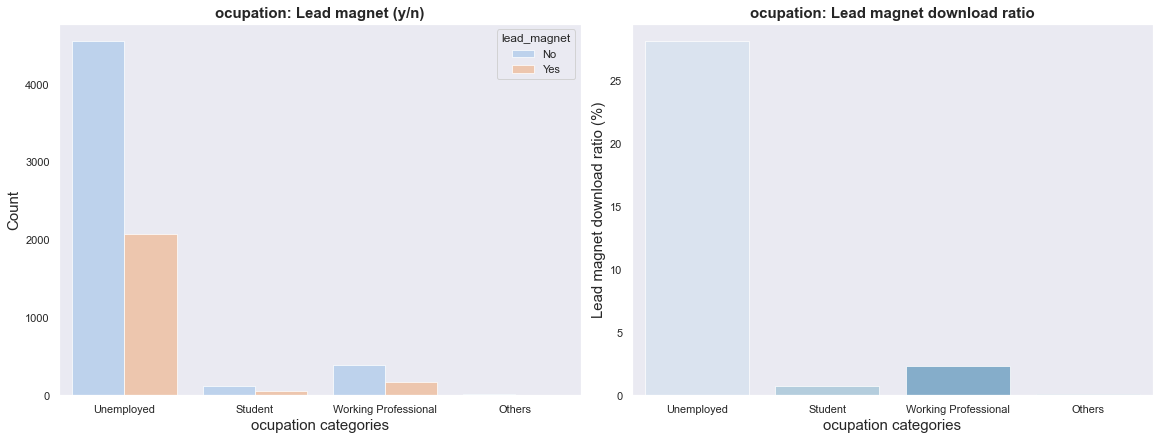


LEAD ORIGIN (LEAD MAGNET)
------------------------------------------------------------------------------------------------------------------------


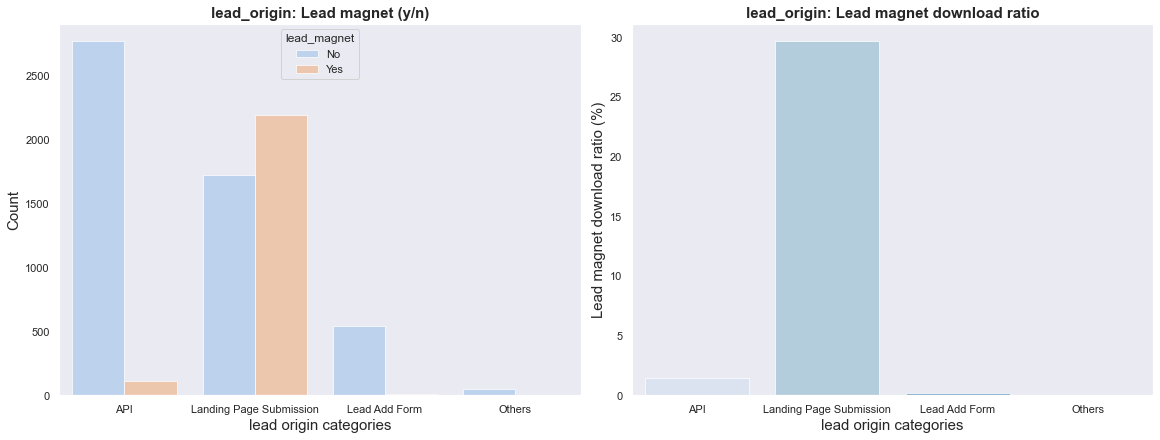

In [15]:
for feature in ['ocupation', 'lead_origin']:
    
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6), constrained_layout=True)
    
    print('\n' + feature.replace('_',' ').upper() + ' (LEAD MAGNET)' + '\n' + '-'*120)
    
    # countplot
    sns.countplot(data=cat, x=feature, hue='lead_magnet', ax=ax[0], palette='pastel', alpha=0.7)
    
    ax[0].set_title(feature + ': Lead magnet (y/n)', fontsize=15, fontweight='bold')
    ax[0].set_ylabel('Count',fontsize=15)
    ax[0].set_xlabel(feature.replace('_',' ') + ' categories',fontsize=15)

    
    
    # Download ratio
    dr = (cat[cat.lead_magnet=='Yes'][feature].value_counts().sort_index() / cat.shape[0]*100).to_frame().reset_index()
    
    sns.barplot(data=dr, x='index', y=feature, ax=ax[1], palette='Blues', alpha=0.7, order=cat[feature].unique())
    
    ax[1].set_title(feature + ': ' + 'Lead magnet download ratio',fontsize=15, fontweight='bold')
    ax[1].set_ylabel('Lead magnet download ratio (%)',fontsize=15)
    ax[1].set_xlabel(feature.replace('_',' ') + ' categories',fontsize=15)

    
    plt.show()  

## EDA - NUMERICAL FEATURES

### Statistical analysis

In [16]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
total_visits,7392.0,3.451028,3.772883,0.0,1.0,3.0,5.0,50.0
total_time_website,7392.0,490.023539,548.193832,0.0,16.0,250.0,942.0,2272.0
page_views_per_visit,7392.0,2.375689,2.101069,0.0,1.0,2.0,3.0,20.0
activity_score,7392.0,14.163014,1.037947,7.0,14.0,14.0,14.0,18.0
profile_score,7392.0,16.189665,1.354103,11.0,16.0,16.0,16.0,20.0
converted,7392.0,0.386499,0.486980,0.0,0.0,0.0,1.0,1.0


### Graphical analysis

In [17]:
def plot_eda_numerical(dataframe):
    check = len(dataframe.select_dtypes('number').columns) == len(dataframe.columns)   
    if check==False:
        dataframe = dataframe.select_dtypes('number')
        print('Only Features of dtype = number have been considered for this analysis.') 
        
    from math import ceil
    n_rows = ceil(dataframe.shape[1] / 2)

    f, ax = plt.subplots(nrows = n_rows, ncols = 2, figsize = (16, n_rows * 6), constrained_layout=True)

    #ax is flattened to facilitate iteration through the graph as if it were 1-dimensional.
    ax = ax.flat 

    for i, feature in enumerate(dataframe):
        sns.kdeplot(data=num, x=feature, ax=ax[i], palette='Blues', lw=1.5)
        ax[i].set_title(feature, fontsize = 15, fontweight = "bold")
        ax[i].set_xlabel(feature, fontsize=14)
        ax[i].set_ylabel('Density', fontsize=14)
        ax[i].tick_params(labelsize = 13)

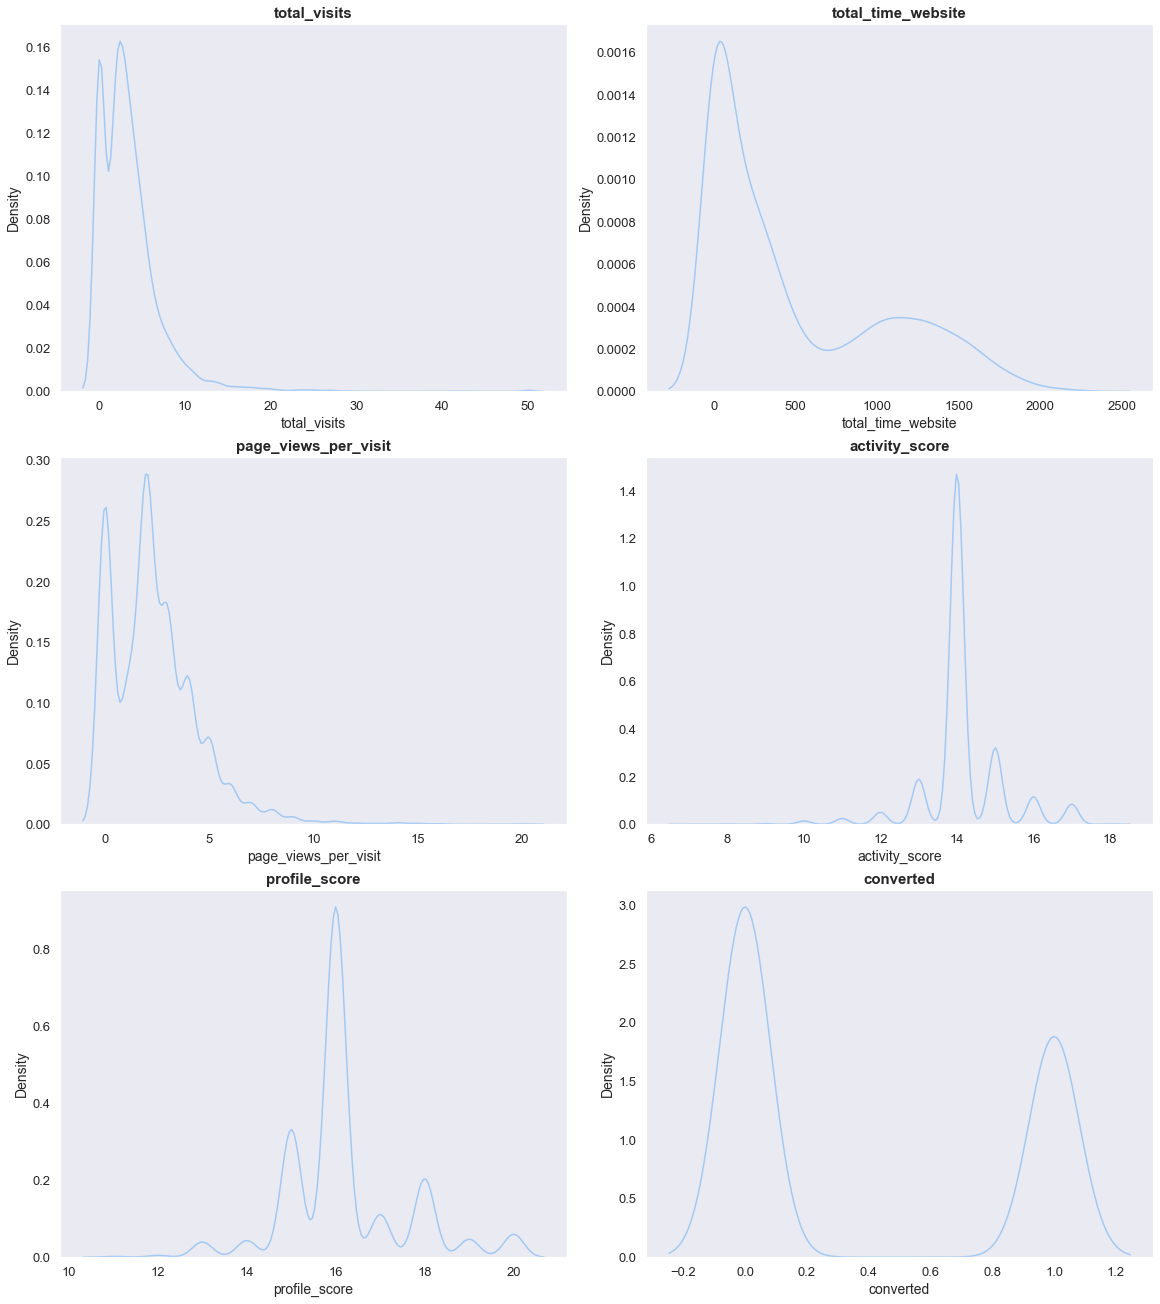

In [18]:
plot_eda_numerical(num)

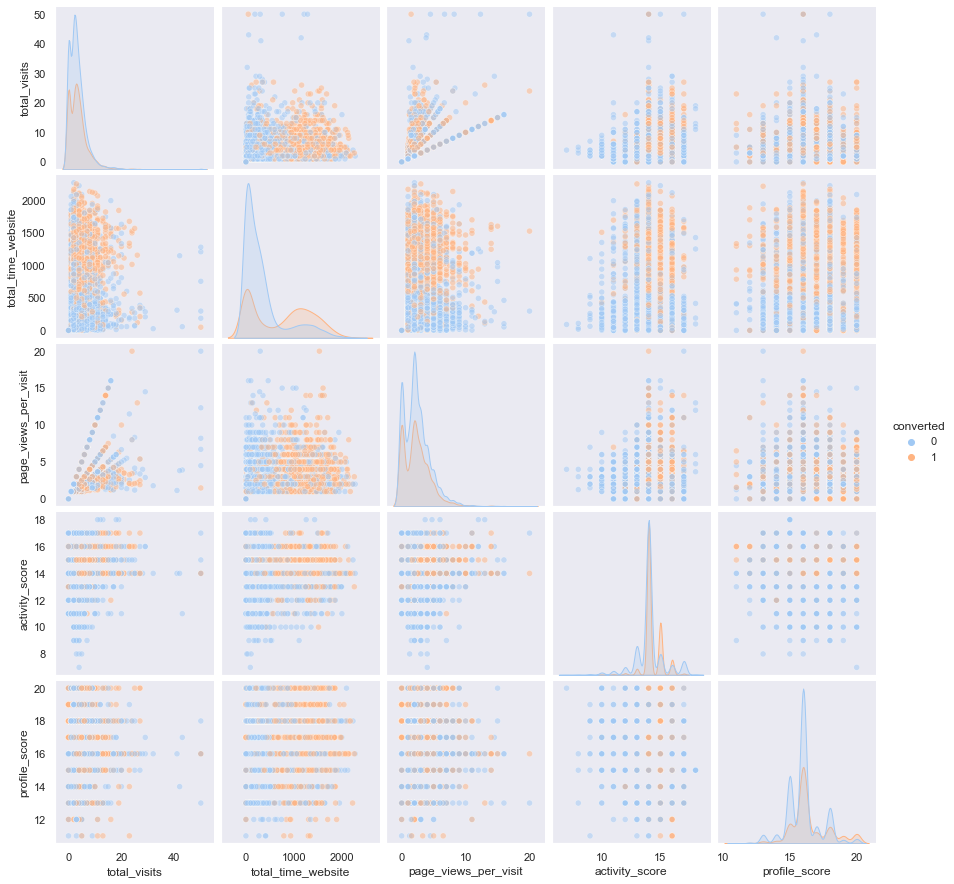

In [19]:
sns.pairplot(num, hue='converted', plot_kws={'alpha': 0.5});

In [20]:
num.groupby('converted').median()

,total_visits,total_time_website,page_views_per_visit,activity_score,profile_score
converted,,,,,
0,3.0,181.0,2.0,14.0,16.0
1,3.0,832.0,2.0,14.0,16.0


Median time (min) spend on the website:

In [21]:
num[['total_time_website','converted']].groupby('converted').median()/60

,total_time_website
converted,
0,3.016667
1,13.866667


- In general, people are more likely to convert if they spend more time on website, regardless to the amount of visits and number of pages viewed.
- Converted leads spent a median of 10 minutes more time viewing the website than those who did not convert.

Some potential factors that might increase the total time spend on the website are analysed below.

In [22]:
def segmented_plot_eda_numerical(num_feature, cat_features, dfnum=num, dfcat=cat):
    for feature in cat_features:
        f, ax = plt.subplots(1,2, figsize=(16,4))      
        
        sns.barplot(data=pd.concat([dfnum,dfcat[feature]],axis=1).groupby([feature,'converted']).median().reset_index(),
                    x=feature, y=num_feature, ax=ax[0], ci=95, estimator=np.median, capsize=.1, errwidth=0.75, alpha=0.7)
        ax[0].set_title(num_feature + ' segmented by ' + feature, fontsize = 13, fontweight = "bold")
        ax[0].set_ylabel(num_feature.replace('_',' '), fontsize=13)
        ax[0].set_xlabel(feature.replace('_',' '), fontsize=13)
        ax[0].tick_params(labelrotation=90) 
        
        sns.barplot(data=pd.concat([dfnum,dfcat[feature]],axis=1).groupby([feature,'converted']).median().reset_index(),
                    x=feature, y=num_feature, ax=ax[1], hue='converted', alpha=0.7, palette='Blues')    
        ax[1].set_title(num_feature + ' segmented by (' + feature + ' , converted)', fontsize = 13, fontweight = "bold")
        ax[1].set_ylabel(num_feature.replace('_',' '), fontsize=13)
        ax[1].set_xlabel(feature.replace('_',' '), fontsize=13)
        ax[1].tick_params(labelrotation=90)

        plt.show()

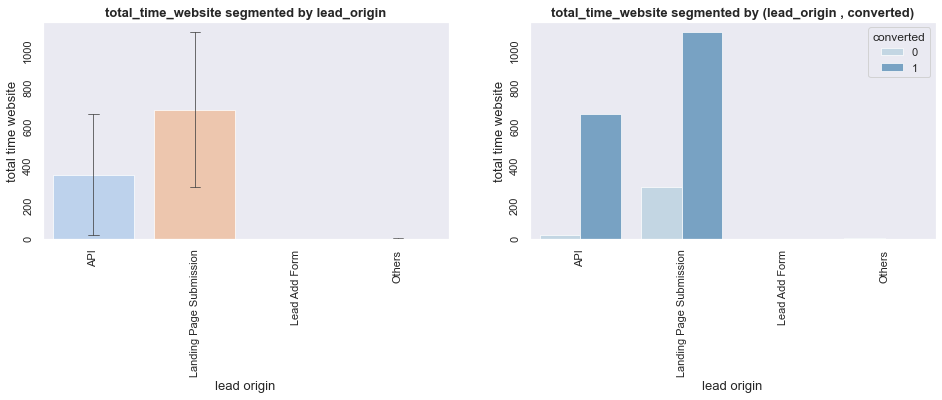

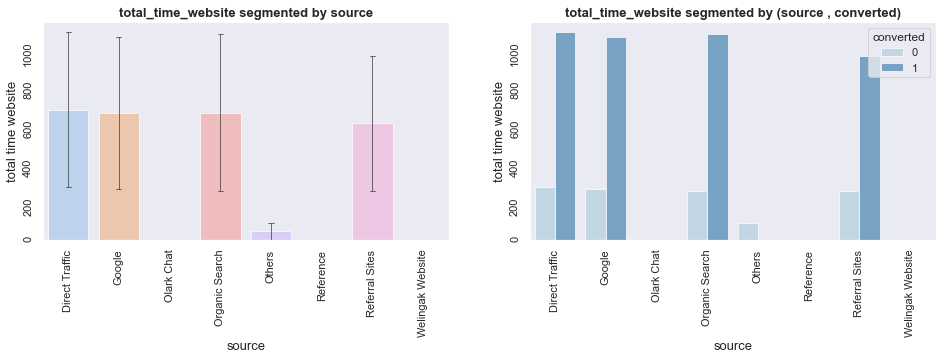

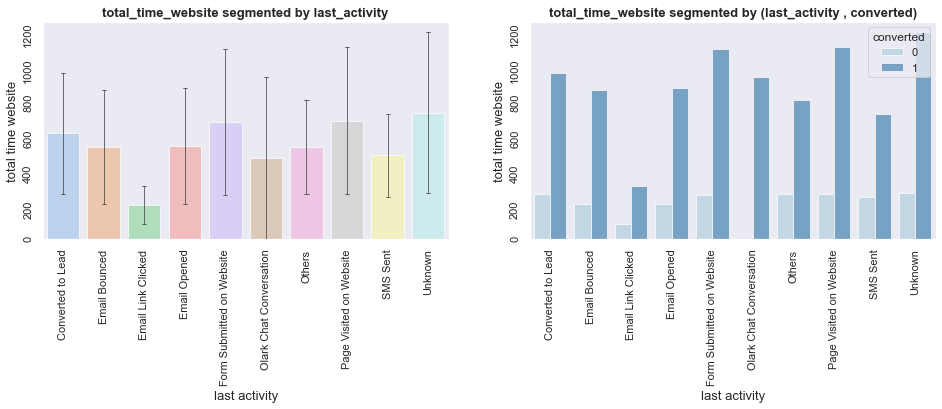

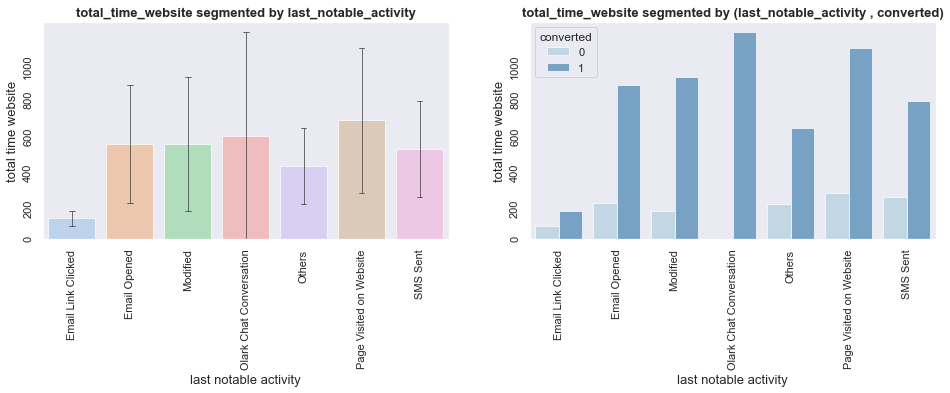

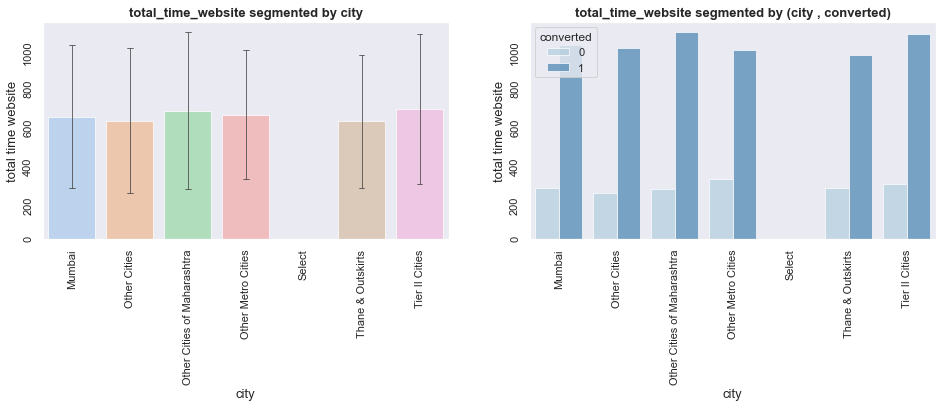

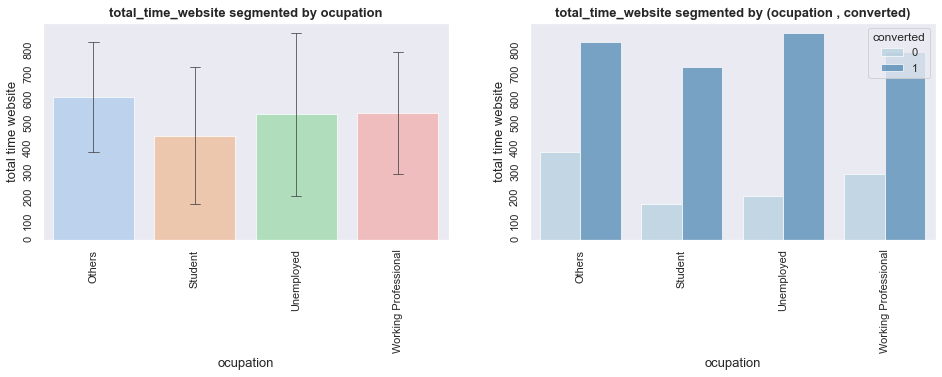

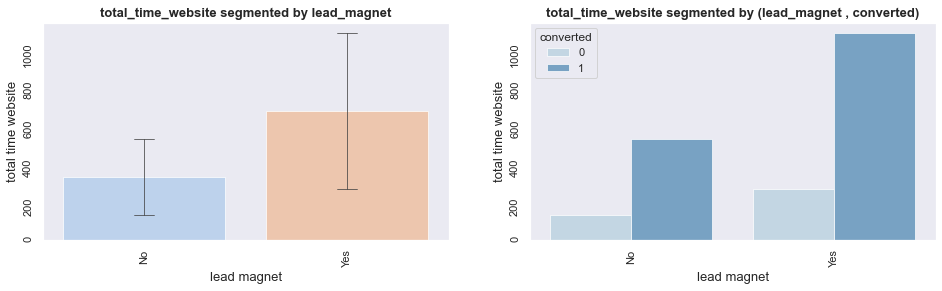

In [23]:
segmented_plot_eda_numerical(num_feature = 'total_time_website',
                             cat_features = ['lead_origin','source','last_activity','last_notable_activity',
                                             'city','ocupation','lead_magnet'])

Nothing conclusive can be drawn from the above graphs apart from the already discovered fact that converted customers spent more time on the website

- Creating engaging content and user-friendly web design could help increase customer retention time on the website.

On the other hand, it is found that the activity index and profile index features are discretisations of the activity score and profile score features respectively.

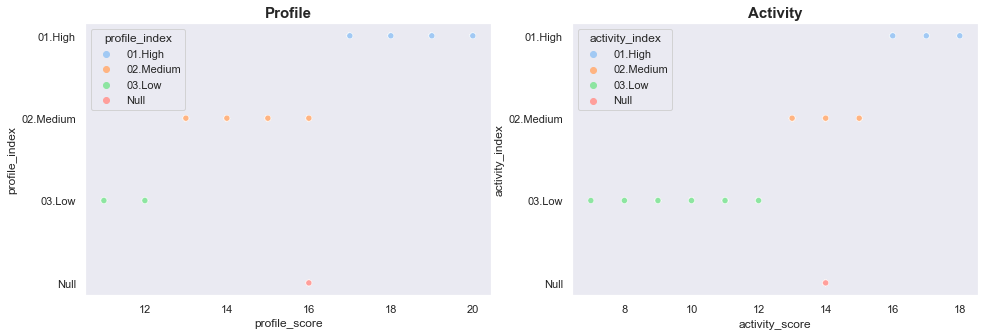

In [24]:
f, ax = plt.subplots(1,2,figsize=(16,5))
sns.scatterplot(data=pd.concat([cat,num],axis=1).sort_values(by='profile_index'), x='profile_score', y='profile_index', 
                hue='profile_index', ax=ax[0])
sns.scatterplot(data=pd.concat([cat,num],axis=1).sort_values(by='activity_index'), x='activity_score', y='activity_index', 
                hue='activity_index', ax=ax[1])
ax[0].set_title('Profile', fontsize=15, fontweight = "bold")
ax[1].set_title('Activity', fontsize=15, fontweight = "bold");

## FEATURE MANAGEMENT

**advertisements - search, newspaper, newspaper article, digital advertisement, through recommendations**:
- Given the high 'No' rate these variables will not be taken into account for modelling purposes.

**last activity, last notable activity**
- Leads whose last activity or last notable activity was 'Email Bounced' will be deleted as these people have entered a temporary or fake email address and therefore cannot be contacted again.

**tags, lead quality, lead profile**
- These features are currently being manually informed by employees based on their intuition and their interactions with potential customers. Since the objective is to automate the lead scoring process, the model to be developed will not employ these features.

**activity and profile index**
- Activity and profile index features will be discarded for the development of the model since they provide the same information as activity and profile score, but with less granularity.

In [40]:
num = num.loc[num.index.isin(cat.loc[~((cat.last_activity=='Email Bounced')|(cat.last_notable_activity=='Email Bounced'))].index)]

In [41]:
cat = cat.loc[~((cat.last_activity=='Email Bounced')|(cat.last_notable_activity=='Email Bounced'))]\
         .drop(columns=['search',
                        'newspaper_article',
                        'newspaper',
                        'digital_advertisement',
                        'through_recommendations',
                        'tags', 
                        'lead_quality',
                        'lead_profile',
                        'activity_index', 
                        'profile_index'])

In [43]:
df = pd.concat([cat,num],axis=1)

## INSIGHTS

### Baseline

**Leads:**
- 96.9% of the total leads are from India.
- 34.9% of the total leads are from Mumbai city.
- 39.5% of potential customers do not provide their city of residence.
- The vast majority (89,7%) of the interested customers that the company is currently attracting are unemployed.
- Only 7.7% of leads are working professionals.
- Activity and profile index features are missing for 45.4% of the leads.
- Regarding profile index feature, almost no leads fall under '03. Low' category.


**Lead-to-customer conversion rate:**
- Current lead-to-customer conversion rate is 38.6%.
- Working professionals have high conversion rate (92.5%), especially those from management sector.
- Unemploeyed leads, although high in number, have low conversion rate (33.9%).
- Almost all leads coming from 'Reference' (91.7% conv. rate) and 'Welingak Website' (98.1% conv. rate) sources end up buying the product. However, only 2.8% of leads come from these sources.
- Leads who hear about the company through recommendations (World of mouth, Student of someschool) have higher conversion rates.
- 94.8% of the leads marked as 'high in relevance' by employees end up becoming paying customers. However, leads classified as 'low in relevance' or 'might be' are also having high conversion rates (81.9% and 75.6% respectively).
- Regarding activity index feature, leads under '02. Medium' category obtains better conversion rates than '01. High' category.


**Commercial and marketing channels:**
- Most leads come from Google (30.8%) and Direct traffic (27.8%). Organic search and Olark chat generates a significat number of leads too (12.7% and 18.8% of the total number of leads respectively).
- Converted leads spent a median of 10 minutes more time viewing the website than those who did not convert, regardless to the amount of visits and number of pages viewed.
- Only 0.24% of the leads indicated on the form that they have seen advertisements from the company.
- Employees are not sure about the quality of 63% of leads, and only have time/information to fill in the lead profile field for 26.1% of all leads.
- Around 92% of leads do not like to be called or receive emails about the course.
- Only 14.8% of leads who want to be contacted by email end up converting into paying customers.
- Email marketing campaigns have untapped potential, as the last notable activity/last activity of 30%-37% of total number of leads was opening an email but only about 37% of them were converted after it.
- Sms campaigns achieved conversion rates of 60%-70% and reached a significant number of leads.
- There are leads tagged as 'Ringing' who selected 'do not want to receive phone calls' on the form.
- Most potential customers were not interested in getting a free copy of the lead magnet. Leads interested in downloading the lead magnet are mostly unemployed and download it mainly from the landing page.

### Actions to improve company's customer knowledge

1. Improve quality of the survey or form questions to receive more user inputs and reduce NaN/default ('Select') values.
2. Improve algorithm for the activity and profile score/index to produce complete and more accurate results.
3. Colect time stamp visiting the website for seasonality analysis and implement cookies to identity and track users as they navigate different pages on the website.
4. Implement a new lead segmentation algorithm that identifies the company's different leads profiles and makes it possible to identify which group best fit for each new lead, in order to be able to carry out more personalised commercial actions.

### Actions to improve lead-to-customer conversion rate

1. Implement a predictive lead scoring algorithm that identifies people who are most likely to convert into paying customers and relieves the sales team of the workload of manually filling in features such as lead_quality, lead_profile or tags so they will be able to spend more time on contacting the most promising customers.

### Actions to improve commercial and marketing channels performance

1. Improve the content strategy of the website, lead magnet and emails to attract traffic and increase the time people spend on the website by creating tailored content mainly for working professionals in the Indian management sector.
2. Create a referral program to encourage existing customers to recommend the course to their friends, family, and colleagues.
3. Invest more resources into acquiring leads from 'Welingak website'.
4. Increase investments in SMS campaigns as they are performing well.
5. Check whether the default value for advertisement features is set to 'No' in the web form, which could explain the high percentage of 'No' for all of them. If this is not the case, then the advertising investment strategy should be completely revised as it is not generating almost any lead (0,24%).
6. Check that the sales team is only contacting people who have given their consent to do so.

## SAVING DATASETS AFTER EDA

Dataframes df, cat and num will be saved once exploratory data analysis procedures have been applied.

In pickle format so as not to lose metadata modifications.

### Defining dataset names

In [44]:
path_work = project_path + '/02_Data/03_Work/' + 'work_result_eda.pickle'
path_cat = project_path + '/02_Data/03_Work/' + 'cat_result_eda.pickle'
path_num = project_path + '/02_Data/03_Work/' + 'num_result_eda.pickle'

### Saving the datasets

In [45]:
df.to_pickle(path_work)
cat.to_pickle(path_cat)
num.to_pickle(path_num)